In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/Bengaluru_House_Data.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
#our goal is to predict the price of the house.
df['price']

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13315    231.00
13316    400.00
13317     60.00
13318    488.00
13319     17.00
Name: price, Length: 13320, dtype: float64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#let check the relation between each feature in the data with respect to price

availability = df['availability'].value_counts()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '21'),
  Text(20, 0, '24'),
  Text(21, 0, '29'),
  Text(22, 0, '36'),
  Text(23, 0, '39'),
  Text(24, 0, '40'),
  Text(25, 0, '41'),
  Text(26, 0, '43'),
  Text(27, 0, '47'),
  Text(28, 0, '62'),
  Text(29, 0, '88'),
  Text(30, 0, '93'),
  Text(31, 0, '98'),
  Text(32, 0, '99'),
  Text(33, 0, '131'),
  Text(34, 0, '143'),
  Text(35, 0, '185'),
  Text(36, 0, '200'),
  Text(37, 0, '271'),
  Text(38, 0, '295'),
  Te

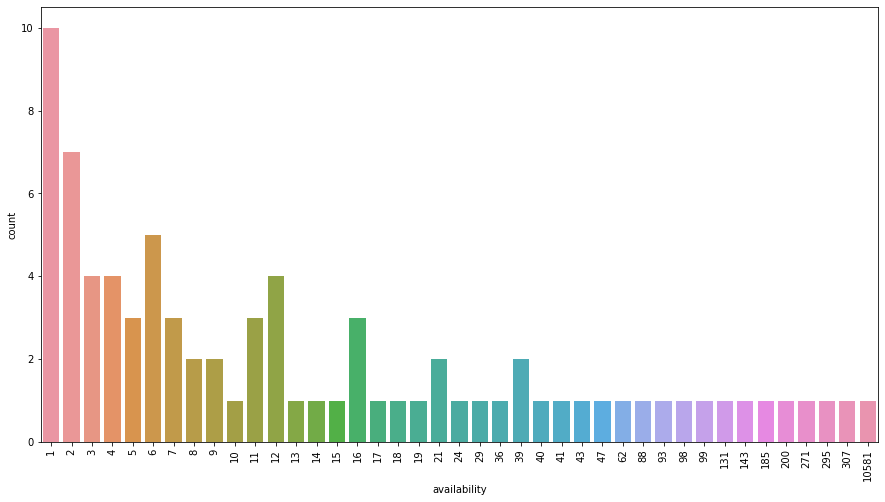

In [15]:
plt.figure(figsize=(15, 8))
sns.countplot(x=availability, data=df)
plt.xticks(rotation=90)

In [19]:
sorted(availability.unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 24,
 29,
 36,
 39,
 40,
 41,
 43,
 47,
 62,
 88,
 93,
 98,
 99,
 131,
 143,
 185,
 200,
 271,
 295,
 307,
 10581]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

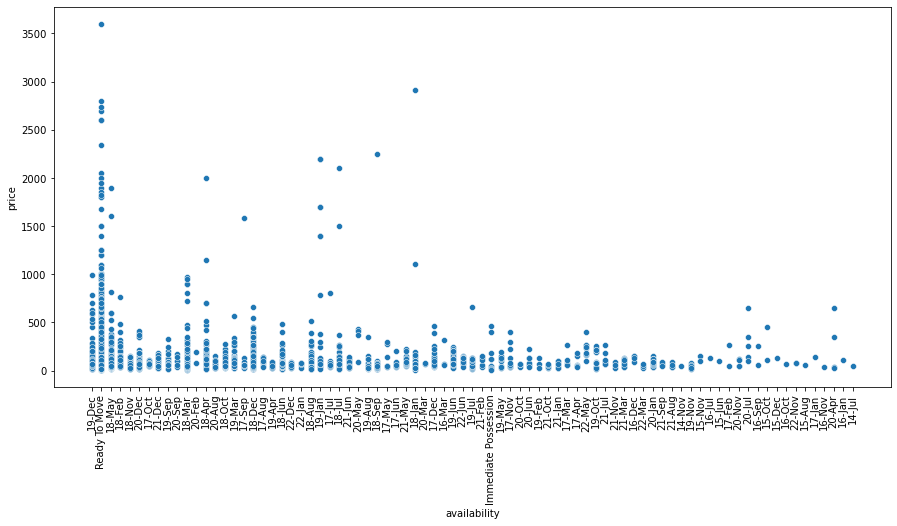

In [24]:
plt.figure(figsize=(15, 7))

sns.scatterplot(x='availability', y='price', data=df)
plt.xticks(rotation=90)

In [25]:
df = df.drop('availability', axis=1)

In [26]:
df.head()

,area_type,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [28]:
df.isnull().sum()

area_type        0
location         1
size            16
society       5502
total_sqft       0
bath            73
balcony        609
price            0
dtype: int64

<AxesSubplot:xlabel='area_type', ylabel='count'>

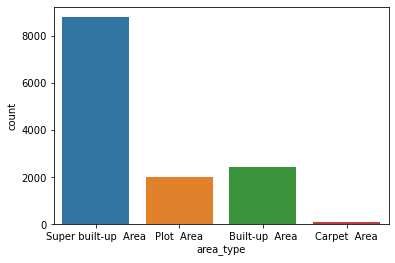

In [29]:
sns.countplot(x=df['area_type'], data=df)

In [30]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='area_type', ylabel='Density'>

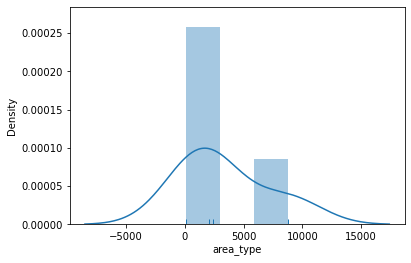

In [32]:
sns.distplot(a=df['area_type'].value_counts(), kde=True, rug=True)

In [34]:
df = df.drop('area_type', axis=1)

In [35]:
df.head()

,location,size,society,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [36]:
df.isnull().sum()

location         1
size            16
society       5502
total_sqft       0
bath            73
balcony        609
price            0
dtype: int64

In [40]:
df[df['location'].isna()]

,location,size,society,total_sqft,bath,balcony,price
568,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0


In [49]:
df['location'].fillna(str(df['location'].mode()), inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29

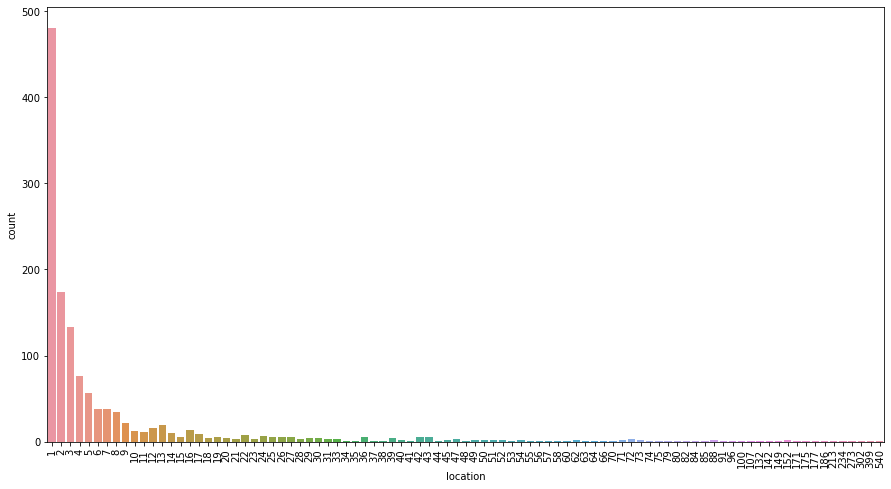

In [53]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df['location'].value_counts(), data=df)
plt.xticks(rotation=90)

In [59]:
df = df.drop('location', axis=1)

In [60]:
df.head()

,size,society,total_sqft,bath,balcony,price
0,2 BHK,Coomee,1056,2.0,1.0,39.07
1,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,3 BHK,NaN,1440,2.0,3.0,62.00
3,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,2 BHK,NaN,1200,2.0,1.0,51.00


In [62]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

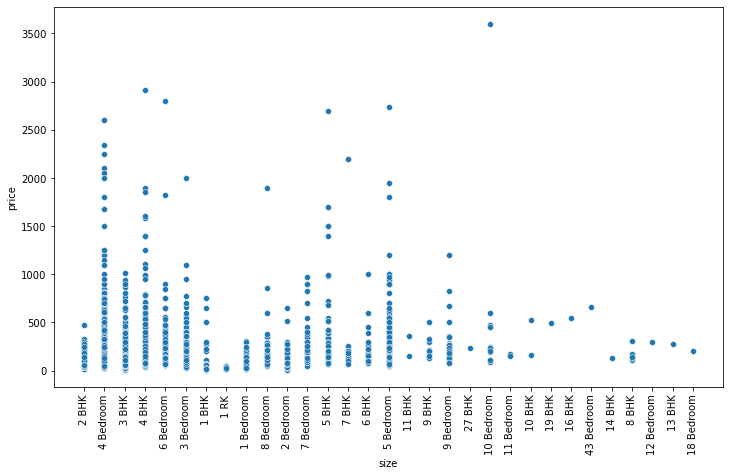

In [66]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='size', y='price', data=df)
plt.xticks(rotation=90)
plt.show()

In [67]:
df['size'].mode()

0    2 BHK
dtype: object

In [68]:
df['size'].fillna(str(df['size'].mode()), inplace=True)

In [69]:
df.isnull().sum()

size             0
society       5502
total_sqft       0
bath            73
balcony        609
price            0
dtype: int64

In [70]:
df['society'].fillna(str(df['society'].mode()), inplace=True)

In [71]:
df['bath'].fillna(float(df['bath'].mean()), inplace=True)

In [72]:
df['balcony'].fillna(float(df['balcony'].mean()), inplace=True)

In [73]:
df.isnull().sum()

size          0
society       0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

<AxesSubplot:xlabel='bath', ylabel='price'>

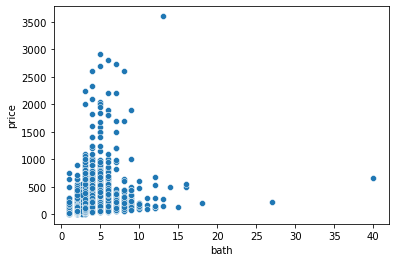

In [77]:
sns.scatterplot(x='bath', y='price', data=df)

<AxesSubplot:xlabel='balcony', ylabel='price'>

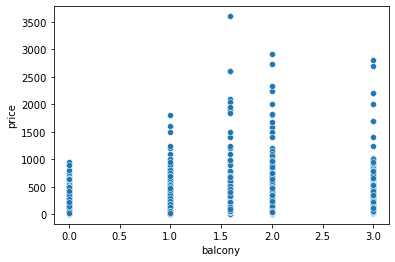

In [78]:
sns.scatterplot(x='balcony', y='price', data=df)

In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
encoder = LabelEncoder()

In [84]:
encoder.fit(df['size'])

LabelEncoder()

In [85]:
df['size_encoded'] = encoder.transform(df['size'])

In [86]:
df.head()

,size,society,total_sqft,bath,balcony,price,size_encoded
0,2 BHK,Coomee,1056,2.0,1.0,39.07,14
1,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,20
2,3 BHK,0 GrrvaGr\ndtype: object,1440,2.0,3.0,62.00,17
3,3 BHK,Soiewre,1521,3.0,1.0,95.00,17
4,2 BHK,0 GrrvaGr\ndtype: object,1200,2.0,1.0,51.00,14


In [88]:
print("", sorted(df['size_encoded'].unique()))

 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [91]:
print("", len(sorted(df['size'].unique())))

 32


In [92]:
df['total_sqrt_encoded'] = encoder.fit_transform(df['total_sqft'])

In [93]:
df['society_encoded'] = encoder.fit_transform(df['society'])

In [94]:
df.head()

,size,society,total_sqft,bath,balcony,price,size_encoded,total_sqrt_encoded,society_encoded
0,2 BHK,Coomee,1056,2.0,1.0,39.07,14,70,465
1,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,20,1288,2440
2,3 BHK,0 GrrvaGr\ndtype: object,1440,2.0,3.0,62.00,17,514,0
3,3 BHK,Soiewre,1521,3.0,1.0,95.00,17,602,2187
4,2 BHK,0 GrrvaGr\ndtype: object,1200,2.0,1.0,51.00,14,239,0


<AxesSubplot:xlabel='total_sqrt_encoded', ylabel='price'>

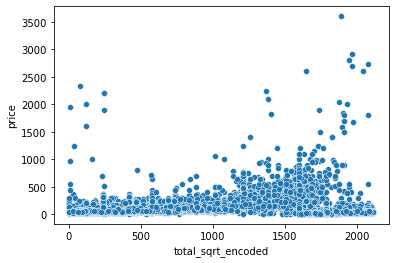

In [96]:
sns.scatterplot(x='total_sqrt_encoded', y='price', data=df)

In [98]:
features = ['bath', 'balcony', 'size_encoded', 'total_sqrt_encoded']

In [103]:
X = df[features].values

In [104]:
X

array([[2.000e+00, 1.000e+00, 1.400e+01, 7.000e+01],
       [5.000e+00, 3.000e+00, 2.000e+01, 1.288e+03],
       [2.000e+00, 3.000e+00, 1.700e+01, 5.140e+02],
       ...,
       [2.000e+00, 1.000e+00, 1.400e+01, 1.720e+02],
       [4.000e+00, 1.000e+00, 1.900e+01, 1.680e+03],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.747e+03]])

In [105]:
y = df['price'].values

In [106]:
y

array([ 39.07, 120.  ,  62.  , ...,  60.  , 488.  ,  17.  ])

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=78)

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
scaler = StandardScaler()

In [111]:
scaler.fit(X_train)

StandardScaler()

In [112]:
X_train = scaler.transform(X_train)

In [114]:
X_test = scaler.transform(X_test)

In [116]:
X_train

array([[-0.53665756, -0.72736028, -0.39393318, -0.71790347],
       [-0.53665756,  0.52168228,  0.26982797, -0.59751822],
       [ 1.81650252,  0.52168228,  0.26982797,  0.73780764],
       ...,
       [-0.53665756, -0.72736028, -0.39393318,  1.97492449],
       [-0.53665756, -1.97640283, -0.17267946, -0.38842805],
       [-0.53665756,  1.77072483,  0.26982797, -0.10330509]])

In [117]:
from sklearn.linear_model import LinearRegression

In [118]:
lr_model = LinearRegression(normalize=True)

In [119]:
lr_model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [120]:
predictions = lr_model.predict(X_test)

In [121]:
predictions

array([ 58.4875959 ,  47.92990531,  47.31091279, ..., 128.95158798,
        57.18392305, 105.53707887])

In [124]:
# ['bath', 'balcony', 'size_encoded', 'total_sqrt_encoded']
q = [2, 1, 14, 70]


In [125]:
q = scaler.transform([q])

In [126]:
result = lr_model.predict(q)

In [127]:
result

array([49.09519175])

In [128]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [129]:
mae = mean_absolute_error(y_test, predictions)

In [130]:
mae

52.747434857650994

In [131]:
mse = mean_squared_error(y_test, predictions)

In [132]:
mse

14048.149873210961

In [134]:
rmse = np.sqrt(mse)

In [135]:
rmse

118.52489136553115

In [144]:
df.describe()

,bath,balcony,price,size_encoded,total_sqrt_encoded,society_encoded
count,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000
mean,2.692610,1.584376,112.565627,15.774474,762.983258,796.394970
std,1.337777,0.798360,148.971674,4.488847,630.502696,874.902267
min,1.000000,0.000000,8.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,50.000000,14.000000,239.000000,0.000000
50%,2.000000,2.000000,72.000000,17.000000,554.000000,431.500000
75%,3.000000,2.000000,120.000000,17.000000,1208.000000,1586.000000
max,40.000000,3.000000,3600.000000,31.000000,2116.000000,2688.000000


In [147]:
true_predictions = pd.DataFrame(y_test, columns=['outcome'])

In [148]:
true_predictions

,outcome
0,66.00
1,16.45
2,43.00
3,40.44
4,42.00
...,...
3991,130.00
3992,75.00
3993,62.00
3994,65.00


In [149]:
test_predictions = pd.DataFrame(predictions, columns=['model_predicitons'])

In [150]:
test_predictions

,model_predicitons
0,58.487596
1,47.929905
2,47.310913
3,73.015950
4,58.918955
...,...
3991,83.845374
3992,76.267303
3993,128.951588
3994,57.183923


In [151]:
df_eval = pd.concat([true_predictions, test_predictions], axis=1)

In [152]:
df_eval

,outcome,model_predicitons
0,66.00,58.487596
1,16.45,47.929905
2,43.00,47.310913
3,40.44,73.015950
4,42.00,58.918955
...,...,...
3991,130.00,83.845374
3992,75.00,76.267303
3993,62.00,128.951588
3994,65.00,57.183923


<AxesSubplot:>

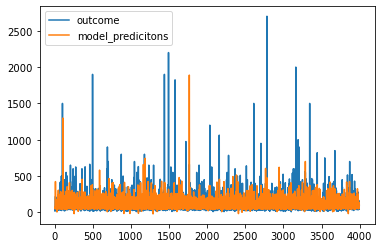

In [153]:
df_eval.plot()